# Probability Distributions

Next we are going to learn about probability distributions. Central to the fields of probability and statistics are *random variables*. Random variables (RVs) are used to model random experiments, such as the roll of a die. 

For each random variable, there is a *probability distribution function* (or probability mass function for discrete RVs) that gives the probability of each outcome in the experiment. 

We will learn about three important distributions today:
- the binomial distribution
- the normal (or "Gaussian") distribution
- and the t distribution. 

As you may remember, random variables (and their outcomes) can be either *discrete* or *continuous*. The binomial distribution is a discrete distribution, while the normal and t distributions are continuous distributions. 

# The Binomial Distribution

A Binomial experiment:
* The process consists of a sequence of $n$ trials.
    * $n=1$ is a common case, and this is known as the **Bernoulli distribution**
* Only two exclusive outcomes are possible for each trial (a success and a failure)
* If the probability of a success is '$p$' then the probability of failure is $q=1-p$
* The trials are independent.
* The random variable $X$ is the number of successes (after these $n$ trials)

The formula for a Binomial Distribution Probability Mass Function turns out to be:

$$Pr(X=k)={n \choose k} p^k (1-p)^{n-k}$$

where n = number of trials, $k$ = number of successes, $p$ = probability of success, $1-p$ = probability of failure (often written as $q=1-p$).
This means that to get exactly '$k$' successes in '$n$' trials, we want exactly '$k$' successes: $$p^k$$ and we want '$n-k$' failures:$$(1-p)^{n-k}$$ Then finally, there are ${n \choose k}$ ways of putting '$k$' successes in '$n$' trials. So we multiply all these together to get the probability of exactly that many success and failures in those $n$ trials!
Quick note, ${n \choose k}$ refers to the number of possible combinations of $N$ things taken $k$ at a time.
This is also equal to: $${n \choose k} =  \frac{n!}{k!(n-k)!}$$


Quick example to get you thinking. Let's say I'm a basketball player and I shoot 200 shots a day with 50% accuracy. On any given day, this is a random experiment with a binomial distribution and 200 trials.

In [1]:
from scipy.stats import binom

n = 200 #number of trials
p = 0.5 #probability of success

# We can get stats: Mean('m'), variance('v'), skew('s'), and/or kurtosis('k')
mn,vr= binom.stats(n,p)

print(mn)
print(vr**0.5)

100.0
7.07106781187


Now let's investigate the mean and standard deviation for the binomial distribution further.
The mean of a binomial distribution is simply: $$\mu=n*p$$
This intuitively makes sense, the average number of successes should be the total trials multiplied by your average success rate.
Similarly we can see that the standard deviation of a binomial is: $$\sigma=\sqrt{n*q*p}$$



Let's try another example to see the full PMF (Probability Mass Function) plot.
Imagine you flip a fair coin. Your probability of getting a heads is p=0.5 (success in this example).
So what does your probability mass function look like for 10 coin flips?

In [2]:
import numpy as np

# Set up a new example, let's say n= 10 coin flips and p=0.5 for a fair coin.
n=10
p=0.5

# Set up n success, remember indexing starts at 0, so use n+1
x = range(n+1)

# Now create the probability mass function
Y = binom.pmf(x,n,p)

#Show
Y

# Next we'll visualize the pmf by plotting it.

array([ 0.00097656,  0.00976563,  0.04394531,  0.1171875 ,  0.20507813,
        0.24609375,  0.20507813,  0.1171875 ,  0.04394531,  0.00976563,
        0.00097656])

Finally we will plot the binomial distribution. 

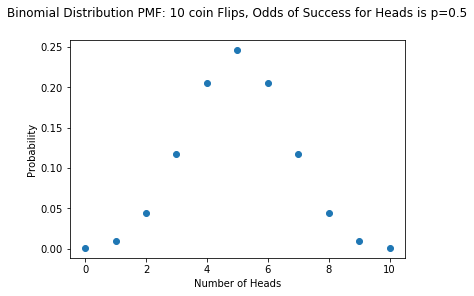

In [3]:
import matplotlib.pyplot as plt

# For simple plots, matplotlib is fine, seaborn is unnecessary.

# Now simply use plot
plt.plot(x,Y,'o')

#Title (use y=1.08 to raise the long title a little more above the plot)
plt.title('Binomial Distribution PMF: 10 coin Flips, Odds of Success for Heads is p=0.5',y=1.08)

#Axis Titles
plt.xlabel('Number of Heads')
plt.ylabel('Probability')
plt.show()

Looks awfully bell shaped...

### Going further
Suppose you play a Blackjack, and have a 50% chance of winning. You start with a \$1 bet, and if you lose, you double the amount you bet on the next play. So if you play three rounds, and Lose, Lose, Win, then you lost \$1 on the first round, \$2 on the second round, but gained \$4 on the first round, for a net profit of \$1.

What is the [expected value](https://en.wikipedia.org/wiki/Expected_value) of your winnings (assuming you play as many rounds as it takes until you win)?

In fact, are you guaranteed to make money?

Why might this be a bad idea in practice?

Note: this is a famous strategy known as the [Gambler's Ruin](https://en.wikipedia.org/wiki/Gambler%27s_ruin)

# The Normal Distribution

Next we will talk about the normal distribution. This is the most important continuous distribution. It is also called the Gaussian distribution, or the bell curve. While the binomial distribution is often considered the most basic discrete distribution, the normal is the most fundamental of all continuous random variables.

In [4]:
from IPython.display import Image
Image(url='https://static.squarespace.com/static/549dcda5e4b0a47d0ae1db1e/54a06d6ee4b0d158ed95f696/54a06d70e4b0d158ed960413/1412514819046/1000w/Gauss_banknote.png')

Now we define the normal pdf. The first equation below is the pdf for the normal distribution with mean $\mu$ and variance $\sigma^2$. The second equations is the standard normal $\Phi$ with mean $0$ and variance $1$. We can always transform our random variable $X \sim {\mathcal {N}}(\mu ,\,\sigma ^{2})$ to the standard normal $Z \sim {\mathcal {N}}(0 , \, 1)$ by using the change of variables formula in the third equation.

$$ f(x\;|\;\mu ,\sigma ^{2})={\frac {1}{\sqrt {2\pi \sigma ^{2}}}}\;e^{-{\frac {(x-\mu )^{2}}{2\sigma ^{2}}}} $$

$$  f(x,\mu,\sigma) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{z^2}{2}} $$

$$ z=\frac{(X-\mu)}{\sigma} $$

The plot of the pdf may be familiar to some of you by now.

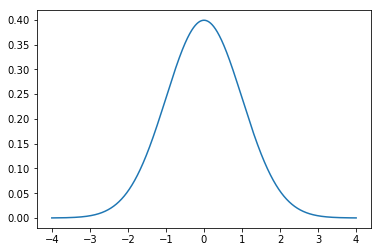

In [5]:
#Import
import matplotlib as mpl
%matplotlib inline

#Import the stats library
from scipy import stats

# Set the mean
mn = 0

#Set the standard deviation
std_dev = 1

# Create a range
X = np.arange(-4,4,0.001)

#Create the normal distribution for the range
Y = stats.norm.pdf(X,mn,std_dev)

#
plt.plot(X,Y)

In [6]:
from IPython.display import Image
Image(url='http://upload.wikimedia.org/wikipedia/commons/thumb/2/25/The_Normal_Distribution.svg/725px-The_Normal_Distribution.svg.png')

The bell curve, centered at the mean, also shows the variance with how wide the bell is. The x-axis gives the realized values of the random variable, and the y values of the curve give the probability these values are realized by the random variable/experiment. This image does a great job of giving a good interpretation of what percent of the outcomes lie within $n$ standard deviations of the mean.

Using python, we can draw samples from a normal distribution and plot these samples using a histogram. The idea is that if we take enough samples, this histogram should look like the bell curve. We first start with 30, then up it to 1000. The histogram gives you a good idea of what the pdf of these samples will look like, but just as a visual aid we also plot a pdf estimator in blue. This is called a kernel density estimator, but it is beyond the scope of this tutorial. We plot the normal distribution these samples came from in green.

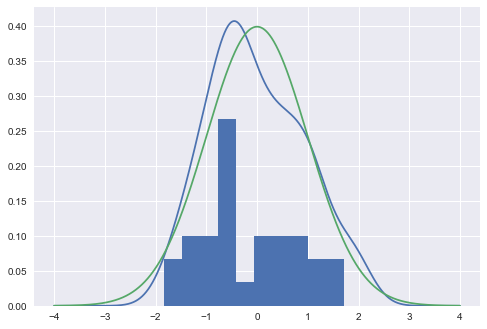

In [12]:
#Set the mean and the standard deviaiton
mu,sigma = 0,1

# Now grab 30 random numbers from the normal distribution
norm_set = np.random.normal(mu,sigma,30)
#Now let's plot it using seaborn

import seaborn as sns
import sklearn as sk
from scipy.stats import gaussian_kde

results, edges = np.histogram(norm_set, normed=True)
binWidth = edges[1] - edges[0]
plt.bar(edges[:-1], results*binWidth, binWidth)

density = gaussian_kde(norm_set)
density.covariance_factor = lambda : .4 #this is the bandwidth in the kernel density estimator
density._compute_covariance()
plt.plot(X,density(X))

plt.plot(X,Y)

With enough samples, this should start to look normal.

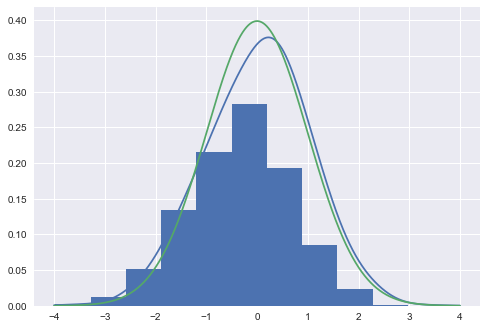

In [13]:
norm2 = np.random.normal(mu, sigma, 1000)

results, edges = np.histogram(norm2, normed=True)
binWidth = edges[1] - edges[0]
plt.bar(edges[:-1], results*binWidth, binWidth)

density = gaussian_kde(norm2)
density.covariance_factor = lambda : .4
density._compute_covariance()
plt.plot(X,density(X))

plt.plot(X,Y)

# Central Limit Theorem

The Central Limit Theorem is one of the most important theorems in statistical theory. It states that when independent random variables are added, their sum tends toward a normal distribution even if the original variables themselves are not normally distributed.  

This may seem obscure so we will explain it with the previous example. We saw that as we took more samples from the normal distribution, the total distribution looks more and more normal. Here we will take more and more samples from a normal, and see how the mean of the samples behaves.

In [14]:
n10 = np.random.normal(mu, sigma, 10)
n100 = np.random.normal(mu, sigma, 100)
n1000 = np.random.normal(mu, sigma, 1000)
n10000 = np.random.normal(mu, sigma, 10000)

print(n10.mean(), n100.mean(), n1000.mean(), n10000.mean() )

(0.3635655219820218, -0.069034139141486012, -0.032583528470999809, 0.0048493401164282877)


We see that as we add more samples, the mean approaches 0, which is the true mean. This is the central limit theorem: the sum of a lot of random variables tends towards a Gaussian distribution (under some conditions). The next image shows how adding more samples to a binomial distribution makes it look more and more Gaussian.

In [15]:
Image(url='https://upload.wikimedia.org/wikipedia/commons/8/8c/Dice_sum_central_limit_theorem.svg')

# Student's t distribution

For the normal distribution it is often assumed that the sample size is assumed large ($N>30$). The t distribution allows for use of small samples, but does so by sacrificing certainty with a margin-of-error trade-off (i.e. a larger variance). The t distribution takes into account the sample size using n-1 degrees of freedom, which means there is a different t distribution for every different sample size. If we see the t distribution against a normal distribution, you'll notice the tail ends increase as the peak get 'squished' down.

To be precise, the t-distribution models the **sample mean** of $N$ observations that are taken from a normal distrubtion.

It's important to note, that as $N$ gets larger, the t distribution converges into a normal distribution.
To further explain degrees of freedom and how it relates to the t distribution, you can think of degrees of freedom as an adjustment to the sample size, such as (n-1). This is connected to the idea that we are estimating something of a larger population, in practice it gives a slightly larger margin of error in the estimate.
Let's define a new variable called t, where : $$t=\frac{\overline{X}-\mu}{s}\sqrt{N-1}=\frac{\overline{X}-\mu}{s/\sqrt{N}}$$
which is analogous to the z statistic given by $$z=\frac{\overline{X}-\mu}{\sigma/\sqrt{N}}$$
The sampling distribution for t can be obtained:
$$  f(t) = \frac {\varGamma(\frac{v+1}{2})}{\sqrt{v\pi}\varGamma(\frac{v}{2})} (1+\frac{t^2}{v})^{-\frac{v+1}{2}}$$
Where the gamma function is: $$\varGamma(n)=(n-1)!$$
And v is the number of degrees of freedom, typically equal to N-1.

Please don't worry about these formulas. Literally no one memorizes this distribution. Just know the binomial and the normal, and the idea of what a t distribution is for (small sample sizes).

The t distribution is plotted in blue, and the normal distribution is in green as well to compare.

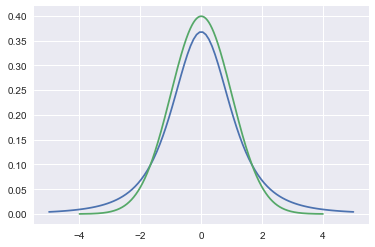

In [22]:
#Import for plots
import matplotlib.pyplot as plt
%matplotlib inline

#Import the stats library
from scipy.stats import t

#import numpy
import numpy as np

# Create x range
x = np.linspace(-5,5,100)

# Create the t distribution with scipy
rv = t(3)

# Plot the PDF versus the x range
plt.plot(x, rv.pdf(x))
plt.plot(X, Y)

Notice that the t distribution in blue has fatter tails than the normal distribution. This means there is more probability of realizing an observation in that region. As a consequence, there is less area under the peak/it is less spikey. This is a reflection of the fact that we have less certainty in where the observations will land because we have a smaller sample size of evidence to support this estimation of the data's distribution.

# Multivariate Normal

A multivariate normal with unequal variances in the x and y direction and principal axes also rotated from the origin. Notice how each shade or horizontal slice looks like an ellipse.

What *is* multivariate data?  It just means more than one dimension. 
*  An example of a **one-dimensional** random variable is the height of a person randomly chosen from this class
*  An example of a **multi-variate** random variable is the (height, shoe-size) of a person randomly chosen from this class

For an example like (height, shoe-size), where x=height and y=shoe-size, we expect the two variables to be correlated.  Other examples, like (height, first-letter-of-your-name) are not correlated.  If the variables are correlated, statistical tests should know about it!

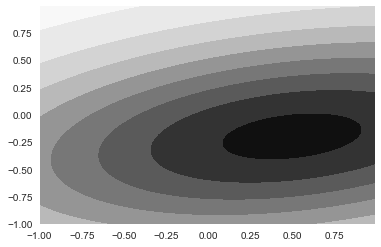

In [40]:
x, y = np.mgrid[-1:1:.01, -1:1:.01]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y
rv = scipy.stats.multivariate_normal([0.5, -0.2], [[2.0, 0.3], [0.3, 0.5]])
plt.contourf(x, y, rv.pdf(pos))